In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

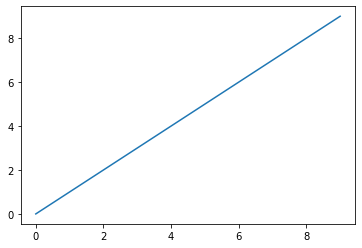

In [3]:
plt.plot(data);

### Figures and subplots

- Plots in matplotlib reside within a __Figure__ object. Can create a figure with __plt.figure__.
- Create one or more __subplots__ using __add_subplot__
- __'k--'__ is a style option instructing matplotlib to plot a black dashed line.
- The objects returned by __fig.add_subplot__ here are __AxesSubplot__ objects,where we can directly plot on the other empty subplots by calling each one's instance method

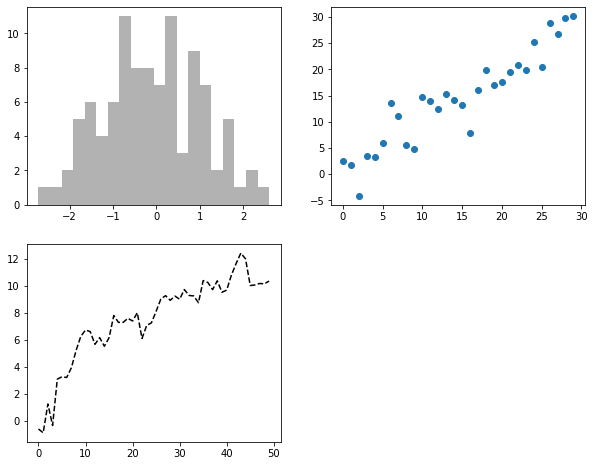

In [4]:
fig = plt.figure(figsize=(10,8))  #figsize: gice figure a certain size and aspect if saved to a disk
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

Creating a figure with a grid of suplots is a very common task, so matplotlib includes a convenience method, __plt.subplots__, that create a new figure and returns a NumPy array containing the create subplot objects.
- __Axes__ array can be easily indexed like a two-dimensional array; for eg, __axes[0,1]__.
- We can alsoe indicate that subplots should have the same x- or y-axes using __sharex__ and __sharey__, respectively.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

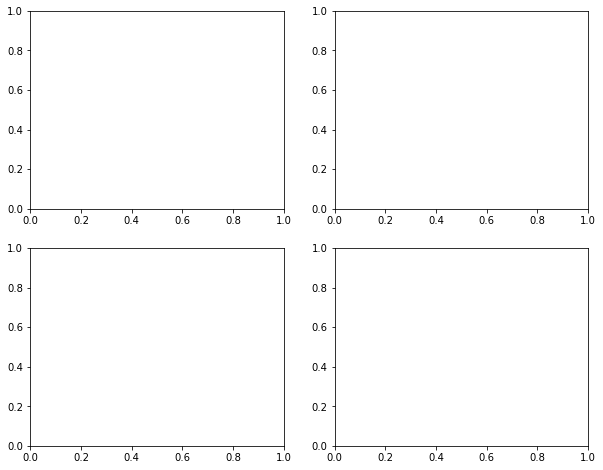

In [5]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
axes

Above visualization can be done with __plt.subplots__

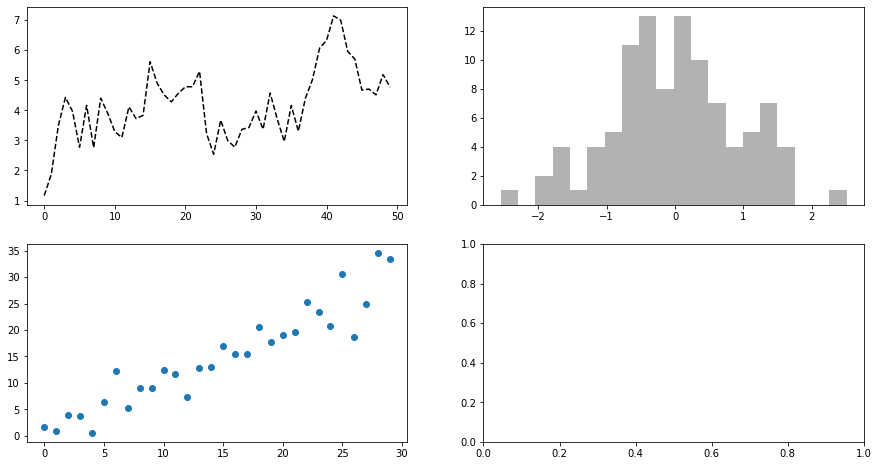

In [6]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
ax1.plot(np.random.randn(50).cumsum(), 'k--')
ax2.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax3.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
plt.show();

#### Table: pyplot.subplot options
| Argument | Description |
| :------- | :---------- |
| nrows | Number of rows of subplots |
| ncols | Number of columns of subplots |
| sharex | All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots) |
| sharey | All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots) |
| subplot_kw | Dict of keywords passed to add_subplot call used to create each subplot |
| \*\*fig_kw | Additional keywords to subplots are used when creating the figure, such as __plt.subplots(2, 2, figsize=(8, 6))__ |

#### Adjusting the spacing around subplots
By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. We can change the spacing using the __subplots_adjust__ method on __Figure__ object, also avaliable as a top-level function:
```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

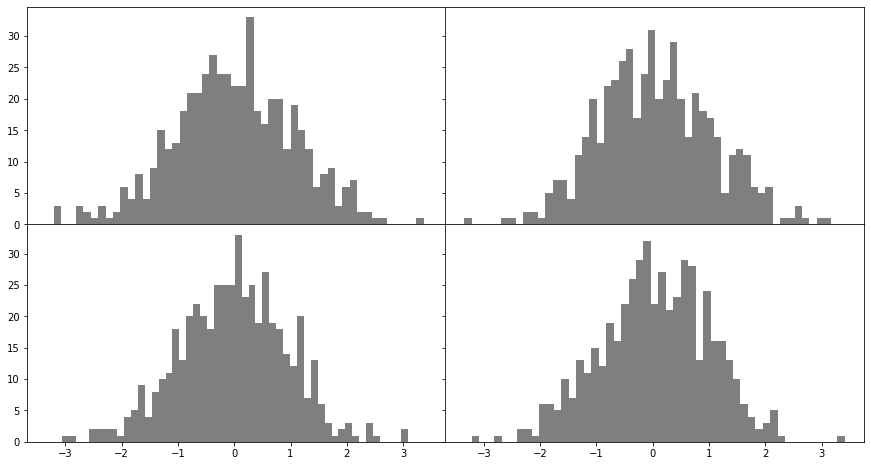

In [7]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,8))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In the above figure, axis labels overlap. matplotlib doesn't check whether the labels overlap, we have to fix the labels by specifying explict tick locationa dn tick labels

### Colors, Markers, and Line Styles

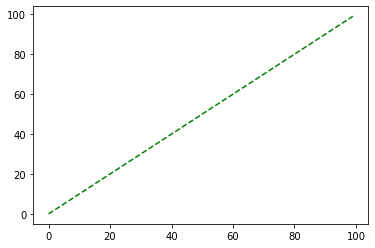

In [8]:
plt.plot(np.arange(100),np.arange(100), 'g--'); #green dashes

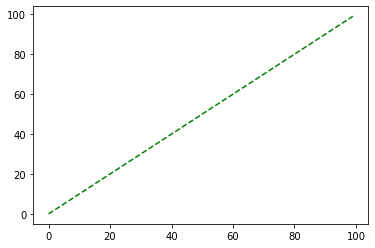

In [9]:
#above same plot can be drawn by explicitly defining linestyle separately
plt.plot(np.arange(100),np.arange(100),linestyle='--', color= 'g');

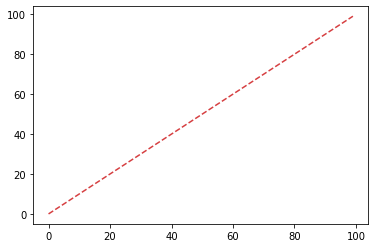

In [10]:
#we can use any color in the spectrum by specifying its hex code
plt.plot(np.arange(100),np.arange(100),linestyle='--', color= '#d63f41');

Line plots can additionally have _markers_ to highlight the actual data points

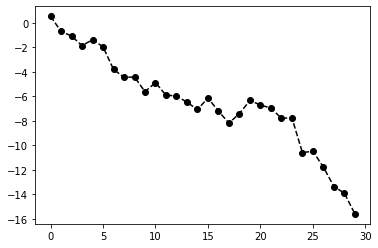

In [11]:
plt.plot(np.random.randn(30).cumsum(), 'ko--');

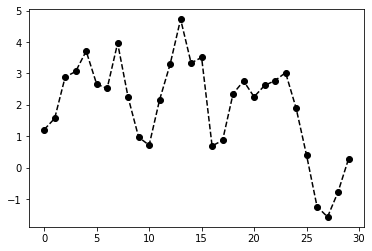

In [12]:
#above code can be written more explicitly
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o');

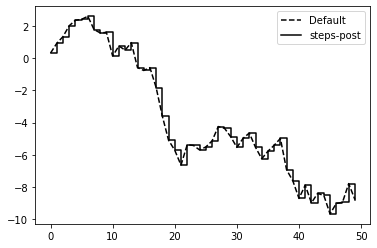

In [13]:
data = np.random.randn(50).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data,'k-', drawstyle='steps-post', label='steps-post')  #label: name of the line
plt.legend(loc='best');  #each line identifier

### Ticks, Labels, and Legends
- __xlim__: plot range
- __ticks__: points in the axes
- __xtickslabels__: label of a tick

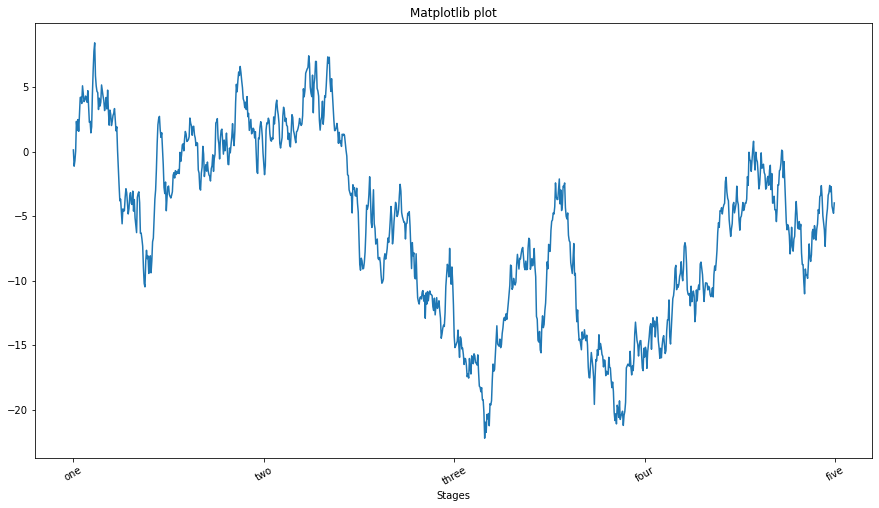

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='medium')
ax.set_xlabel('Stages')
ax.set_title('Matplotlib plot')
ax.plot(np.random.randn(1000).cumsum());

#### Setting label and title can also be done using _set_ method. This method allows batch setting of plot properties
```python
    props = {
        'title': 'My first matplotlib plot',
        'xlabel': 'Stages'
        }
    ax.set(**props)
```

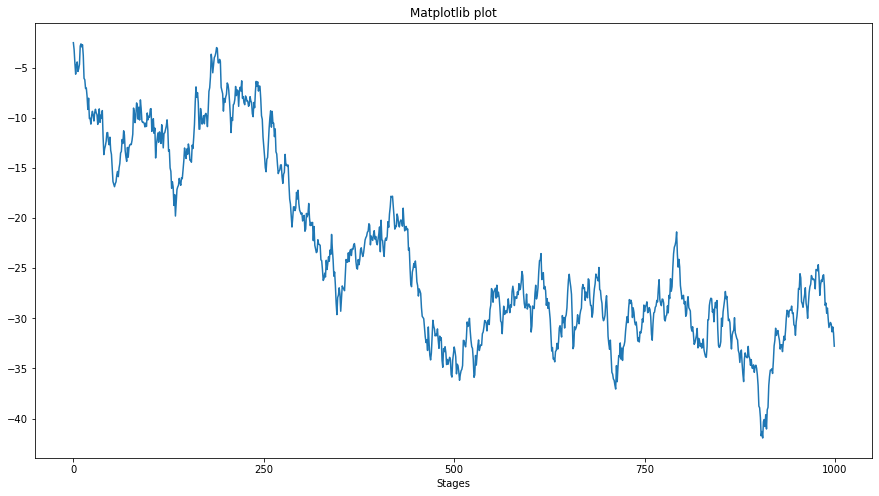

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
props = {
    'title': 'Matplotlib plot',
    'xlabel': 'Stages',
    'xticks': [0,250,500,750,1000],
}
# ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='medium')
ax.set(**props)
ax.plot(np.random.randn(1000).cumsum());

#### Adding Legends
- Pass __label__ argument when adding each piece of the plot

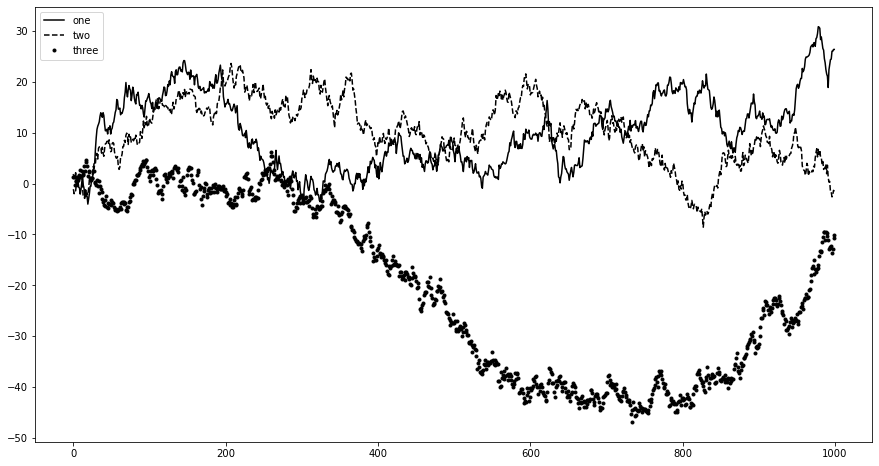

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
#after this we can either call ax.legend() or plt.legend() to automatically create a legend
ax.legend(loc='best')  #loc tell matplotlib where to place the plot

### Annotations and Drawing on a Subplot
- We can add our own plot annotations and text which consist of text, arrows, or other shapes using __text, arrow, and annotate__ functions.
- __text__ draws text at given coordinates __(x,y)__ on the plot with optional custom styling
```python
    ax.text(x, y, 'Hello world!',
            family='monospace', fontsize=10)
```

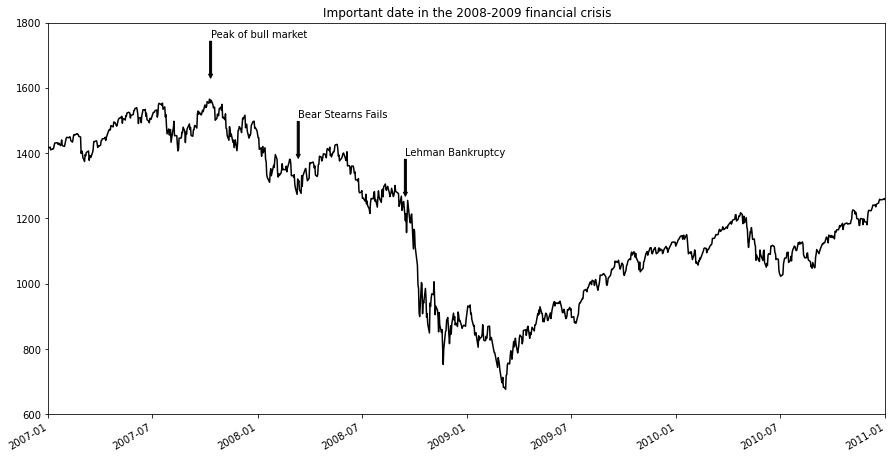

In [17]:
from datetime import datetime
fig, ax = plt.subplots(figsize=(15,8))
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
               xytext = (date, spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important date in the 2008-2009 financial crisis')
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [18]:
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

### Saving Plots to File
- Save the active figure to file using __plt.savefig__. This method is equivalent to the figure objects __savefig__ instance method.

In [19]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

Couple of important options for publishing graphics:
- __dpi__, which controls the dots-per-inch resolution, and 
- __bbox_inches__, which can trim the whitespace around the actual figure«

In [20]:
#plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

__savefig__ doesn't have to write to disk; it can also write to any file-like object, such as a __BytesIO__

In [21]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

#### Tabel: Figure.savefig options
| Argument | Description |
| :------- | :---------- |
| fname | String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG) |
| dpi | The figure resolution in dots per inch; defaults to 100 out of the box but can be configured |
| facecolor, edgecolor | The color of the figure background outside of the subplots; 'w' (white), by default |
| format | The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...) |
| bbox_inches | The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure |

### matplotlib Configuration
matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. But nearly all of the defualt behavior can be customized via extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration programmatically from Python is to use the __rc__ method

In [22]:
#setting the global default figure size to be 10x10
plt.rc('figure', figsize=(10,10)) 
#first argument is the component to customize such as 'figure','axes','xtick','grid', 'legend'
#which is followed by a sequence of keyword arguments indicating the new parameters

In [23]:
font_options = {
    'family':'monospace',
    'weight':'bold',
    'size':'12'
}
plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes
with a configuration file _matplotlibrc_ in the _matplotlib/mpl-data_ directory. If you customize this file and place it in your home directory titled _.matplotlibrc_, it will be
loaded each time you use matplotlib.

## Plotting with pandas and seaborn
- __Seaborn__, a statistical graphics library which simplifies creating many common visualization types

In [24]:
import seaborn as sns

### Line Plots

<AxesSubplot:>

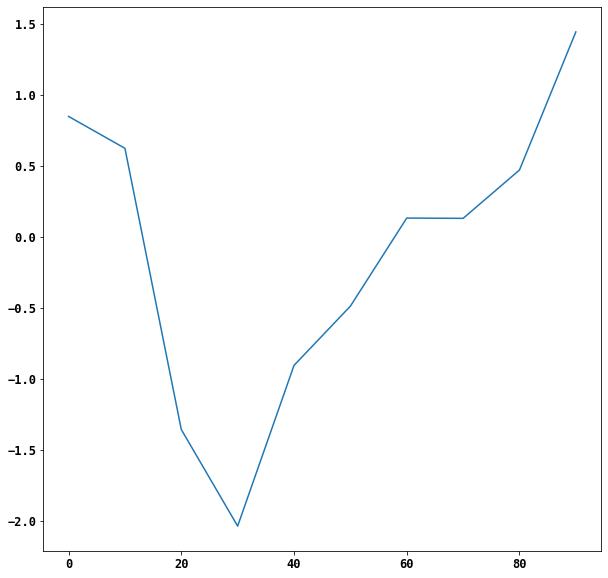

In [25]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

The Series object's index is passed to matplotlib for plotting on the x-axis, which can be disabled using __use_index=False__ argument. Also the ticks and limits of respective axes can be adjusted with the __xticks__ and __xlim__ options.

<AxesSubplot:>

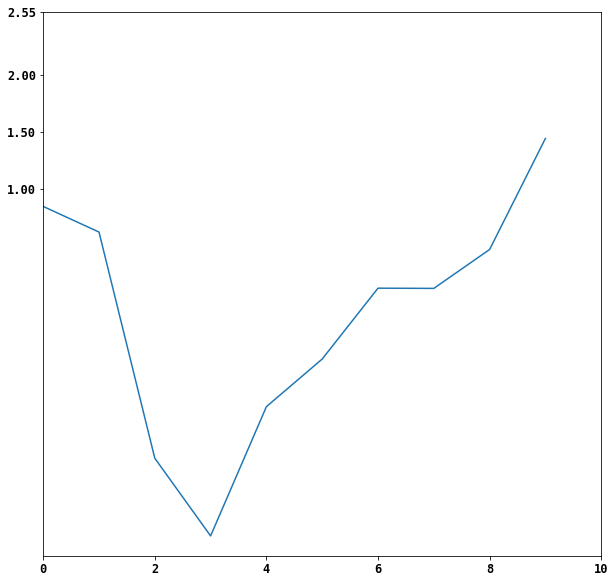

In [26]:
s.plot(use_index=False, xlim=(0,10), yticks=[1.00, 1.50, 2.00, 2.55])

<AxesSubplot:>

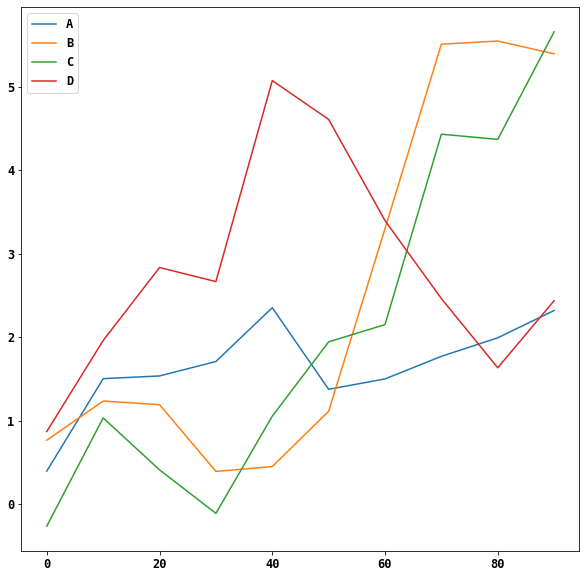

In [27]:
#plot method in DF creates different line for each of its columns creating a legend for each line
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()  #this is equivalent to df.plot().line()

#### Table: Series.plot method arguments
| Argument | Description |
| :------- | :---------- |
| label | Label for plot legend |
| ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot |
| style | Style string, like __'ko--'__, to be passed to matplotlib |
| alpha | The plot fill opacity (from 0 to 1) |
| kind | Can be __'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'__ |
| logy | Use logarithmic scaling on the y-axis |
| use_index | Use the object index for tick labels |
| rot | Rotation of tick labels (0 through 360) |
| xticks | Values to use for x-axis ticks |
| yticks | Values to use for y-axis ticks |
| xlim | x-axis limits (__e.g., [0, 10]__) |
| ylim | y-axis limits |
| grid | Display axis grid (on by default) |

#### Table: DataFrame-specific plot arguments
| Argument | Description |
| :------- | :---------- |
| subplots | Plot each DataFrame column in a separate subplot |
| sharex | If __subplots=True__, share the same x-axis, linking ticks and limits |
| sharey | If __subplots=True__, share the same y-axis |
| figsize | Size of figure to create as tuple |
| title | Plot title as string |
| legend | Add a subplot legend (True by default) |
| sort_columns | Plot columns in alphabetical order; by default uses existing column order |

### Bar Plots
- __plot.bar() and plot.barh()__ make vertical and horizontal bar plots, repectively,

<AxesSubplot:>

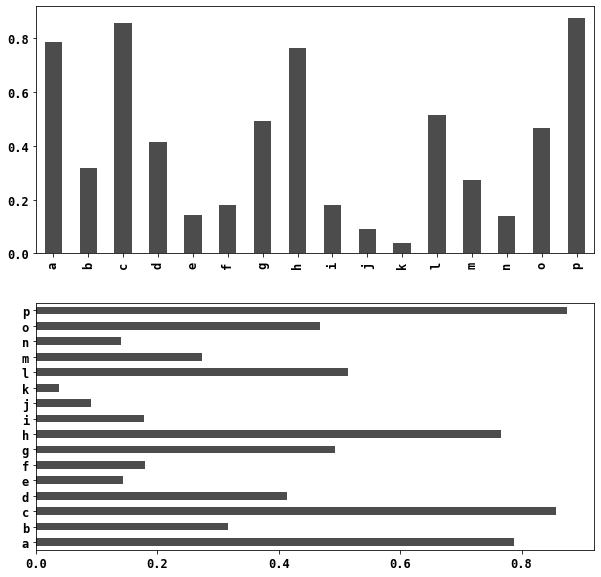

In [28]:
fig, ax = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=ax[0], color='k',alpha=0.7)
data.plot.barh(ax=ax[1], color='k', alpha=0.7)

Visualize Series's value frequency using __value_counts__: __s.value_counts().plot.bar()__

<AxesSubplot:>

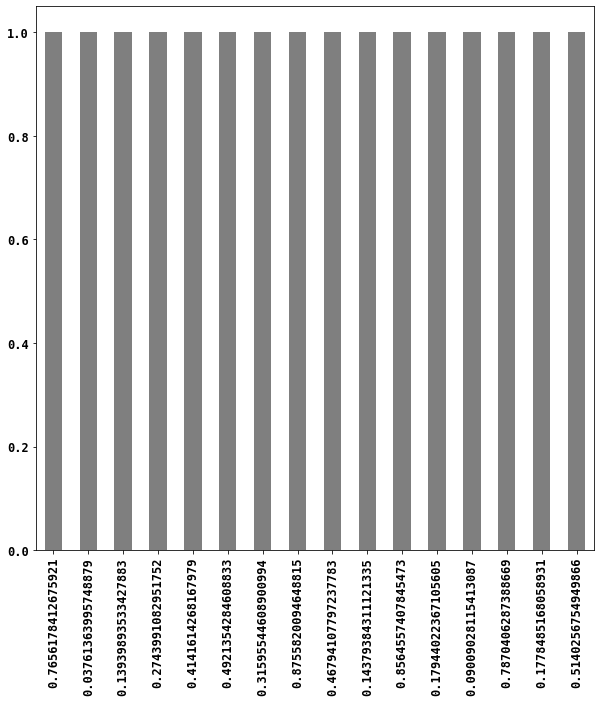

In [29]:
data.value_counts().plot.bar(color='k', alpha=0.5)

With a DF, bar plots group the values in each row togher in a group in bars, side b side, for each rowm

In [30]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.041870,0.628200,0.125530,0.899813
two,0.833970,0.542691,0.889175,0.299215
three,0.111697,0.391835,0.351554,0.488403
four,0.172160,0.802715,0.054326,0.859971
five,0.859716,0.275415,0.381105,0.213411
six,0.521983,0.477831,0.435498,0.317730


<AxesSubplot:>

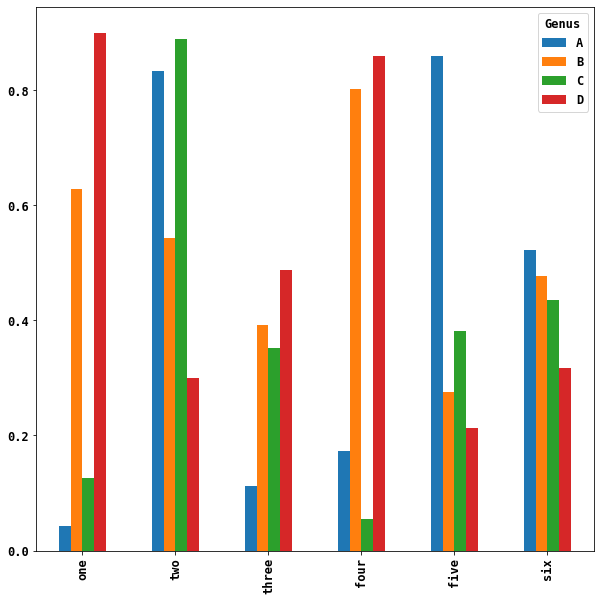

In [31]:
df.plot.bar()
#name of the columns is used to title the legeng

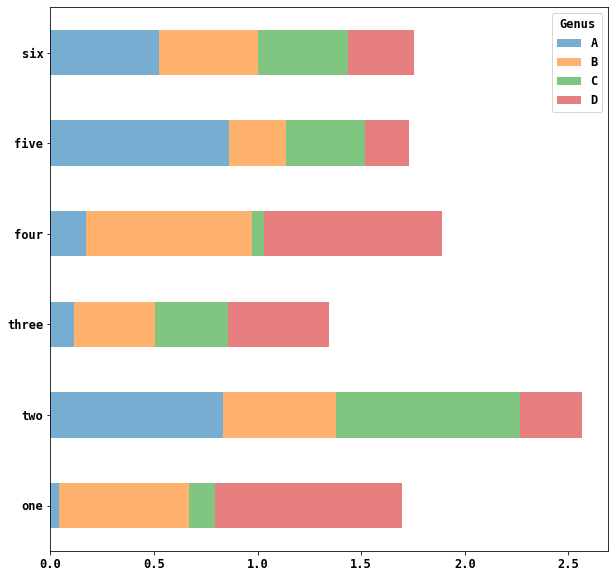

In [32]:
#creating stacked bar plots from DF by passing stacked=True
df.plot.barh(stacked=True, alpha=0.6);

Cross-tabulation (or crosstab) is a two- (or more) dimensional table that records the number (frequency) of respondents that have the specific characteristics described in the cells of the table.

In [33]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [34]:
party_counts = party_counts.loc[:, 2:5]
# normalize each row sums to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)  #in sum to sum each row we pass columns(1)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


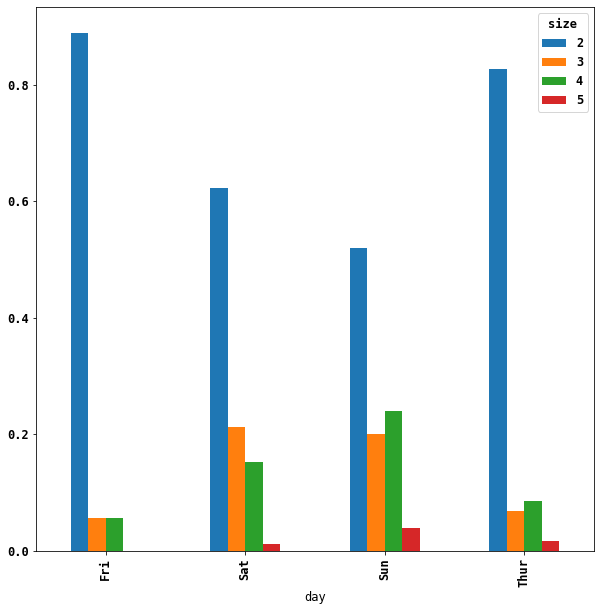

In [35]:
party_pcts.plot.bar();

With data that required aggregation or summarization before making a plot, using __seaborn__ package can make things much simpler.

In [36]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

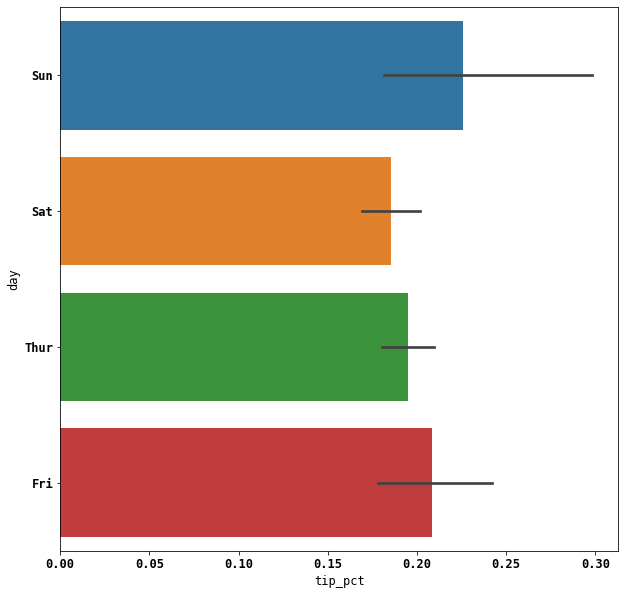

In [37]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the day, _the bars are the average value of tip_pct. The black lines drawn on the bars represent the 95% confidence interval_

__seaborn.barplot__ has a __hue__ option that enables us to split by an additional categorical value.

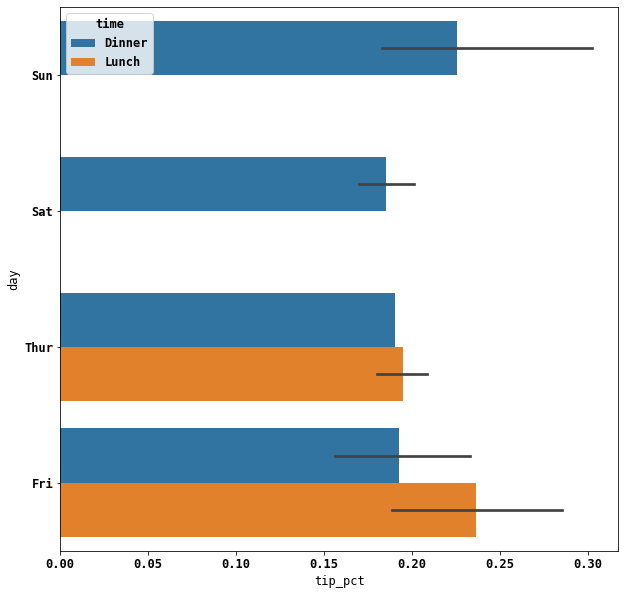

In [38]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h');

In [39]:
sns.set(style='whitegrid')

### Histogram and Density Plots

<AxesSubplot:ylabel='Frequency'>

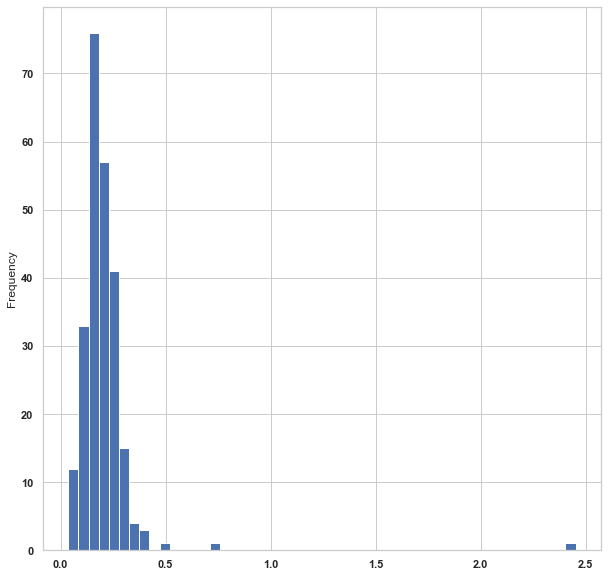

In [40]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a ___density plot___, which is formed by computing an estimate of a continuous probability distribution that might have generated the oberved data. The usual procedure is to approximate this distributiong as a mixture of "kernels"-that is, simpler distributions like the normal distribution. Thus, density plots are also know as __kernel density estimate (KDE) plots. Using plot.kde makes a density plot usingthe conventional mixture-of-normals estimate__

<AxesSubplot:ylabel='Density'>

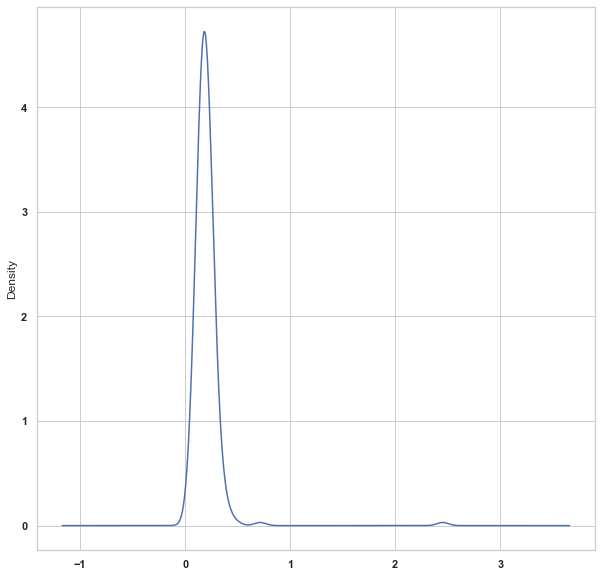

In [41]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier thriugh its __displot__ method, which can plot a histogram and a continuous density estimate simultaneously.
<br><br>
__Bimodal distribution is a probability distribution that has two different modes and used to describe distributions of values that have two centers__

/Users/rehka/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

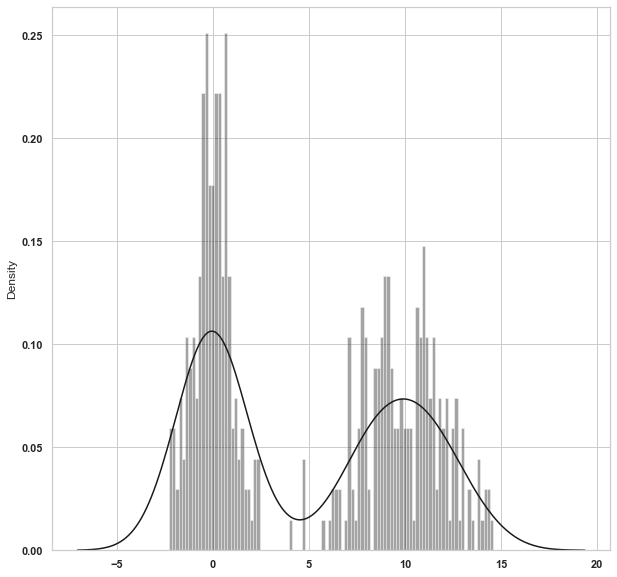

In [42]:
#creating a bimodal distribution using two different standard normal distribution
comp1= np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point plots

In [46]:
macro = pd.read_csv('examples/macrodata.csv')
macro.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [45]:
data = macro[['cpi', 'm1','tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Using seaborn's __regplot__ method, which makes a scatter plot and first a linear regression line

/Users/rehka/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


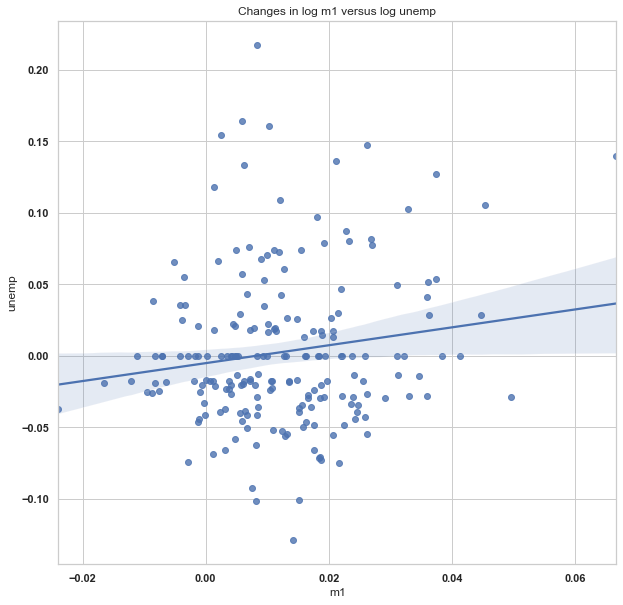

In [48]:
sns.regplot('m1','unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' %('m1','unemp'));

When we have to plot a scatter plots among a group of variable; this is known as a __pairs__ plot or __scatter plot matrix__. For this, we can use __pairplot__ function of __seaborn__ which supports placing histgrams or density estimates of each variable along the diagonal.

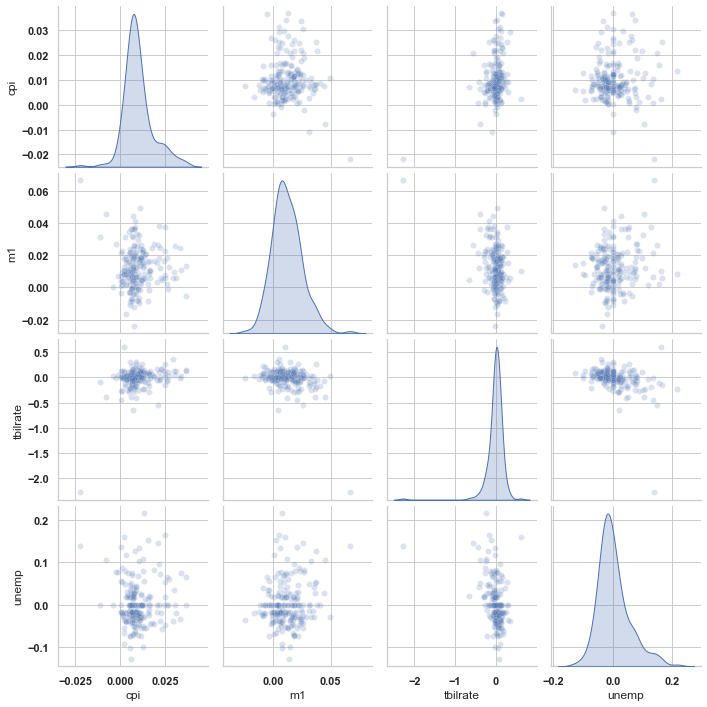

In [49]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})  
#plot_kws enables to padd down configuration option to the individual plotting calls on the off-diagonal elements

### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a __facet grid__. Seaborn has a useful built-in function __catplot__ that simplifies making many kinds of faceted plots

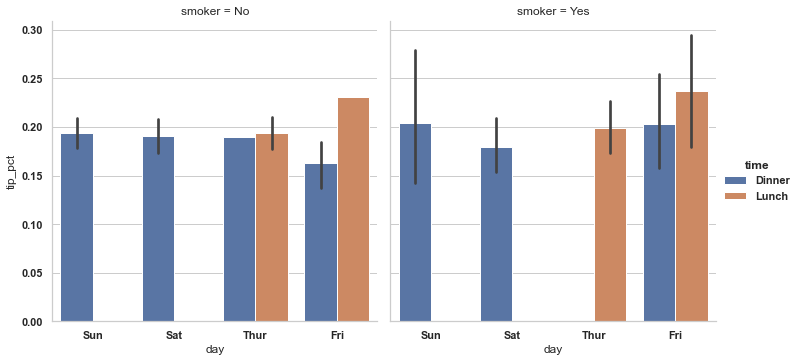

In [53]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

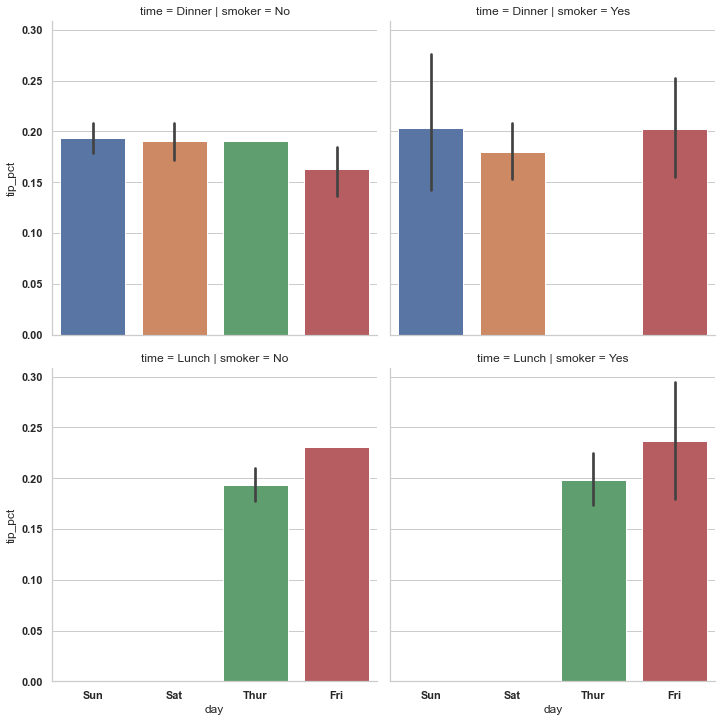

In [55]:
#expanding facet grid by adding one roe per time value
sns.catplot(x='day', y='tip_pct', row='time',col='smoker',kind='bar', data=tips[tips.tip_pct<1])

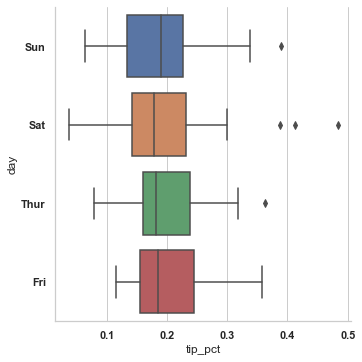

In [57]:
#box plots(which show the median, quartile, and outliers)
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct<0.5]);